# Keras - Dense neural network

bla

#### Importere biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Making plots look better (Jupyter Notebook spesific)
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

# Built in jupyter notebook commands
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Importere datasett

In [2]:
data_raw = pd.read_csv('data_skomakerfjellet_simple.csv',sep =';', low_memory = False)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 14 columns):
SKOM-Skomakerfj.-GS-T4015A3 -0104    5235 non-null float64
DNMI_69100...........T0015A3-0120    5237 non-null float64
/arome_windvel_6347_1092             5190 non-null float64
DNMI_71550...........T0015A3-0120    5237 non-null float64
/arome_windvel_6372_0961             5190 non-null float64
DNMI_71850...........T0015A3-0120    5237 non-null float64
/arome_windvel_6413_0933             5190 non-null float64
DNMI_71990...........T0015A3-0120    5237 non-null float64
/arome_windvel_6440_1047             5190 non-null float64
DNMI_72580...........T0015A3-0120    5237 non-null float64
/arome_windvel_6447_1156             5190 non-null float64
STORM-Bess-Vindretn-25km             5237 non-null int64
STORM-Bess-Vindhast-25km             5237 non-null float64
Target                               5235 non-null float64
dtypes: float64(13), int64(1)
memory usage: 572.9 KB


In [3]:
data = data_raw.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5186 entries, 0 to 5236
Data columns (total 14 columns):
SKOM-Skomakerfj.-GS-T4015A3 -0104    5186 non-null float64
DNMI_69100...........T0015A3-0120    5186 non-null float64
/arome_windvel_6347_1092             5186 non-null float64
DNMI_71550...........T0015A3-0120    5186 non-null float64
/arome_windvel_6372_0961             5186 non-null float64
DNMI_71850...........T0015A3-0120    5186 non-null float64
/arome_windvel_6413_0933             5186 non-null float64
DNMI_71990...........T0015A3-0120    5186 non-null float64
/arome_windvel_6440_1047             5186 non-null float64
DNMI_72580...........T0015A3-0120    5186 non-null float64
/arome_windvel_6447_1156             5186 non-null float64
STORM-Bess-Vindretn-25km             5186 non-null int64
STORM-Bess-Vindhast-25km             5186 non-null float64
Target                               5186 non-null float64
dtypes: float64(13), int64(1)
memory usage: 607.7 KB


In [4]:
num_features = len(data.columns) -1
print(num_features)

13


#### Konvertere til numpy-arrays

In [5]:
# Konverterer pandas.DataFrame til en numpy array
all_features_and_target_value = data.values.astype("float32")

# Trekker ut alle features (5 aromepunkter med 4 features + delayed = 21 features)
x = all_features_and_target_value[:,0:num_features]

# Trekker ut produksjonen som y-verdi
y = all_features_and_target_value[:,num_features]

#### Skalere data

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Lage en scaler
scaler = MinMaxScaler()

# Anvende på features, her lagret i variablen x.
x = scaler.fit_transform(x)

#### Train/test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 67)

# Keras

In [8]:
import tensorflow as tf

#### Importere modellen

In [9]:
from tensorflow.contrib.keras import models

In [10]:
dnn_keras_model = models.Sequential()

#### Sette opp layers

In [11]:
from tensorflow.contrib.keras import layers

In [12]:
# Input layer
dnn_keras_model.add(layers.Dense(units=32, input_dim= num_features, activation='relu'))

In [13]:
'''Hidden Layers'''

dnn_keras_model.add(layers.Dense(units=16,activation='relu'))

dnn_keras_model.add(layers.Dense(units=8,activation='relu'))

dnn_keras_model.add(layers.Dense(units=2,activation='relu'))


In [14]:
# Output Layer
dnn_keras_model.add(layers.Dense(1))

#### Kompilere modellen

In [15]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

In [16]:
#Kompilere - Alternative lossfunctions: mean_squared_error
dnn_keras_model.compile(optimizer='adam', loss = 'mean_absolute_error')

#### Trene modellen

In [17]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

#### Callbacks og checkpoints

In [18]:
from tensorflow.contrib.keras import callbacks

In [19]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=500)

checkpoint = callbacks.ModelCheckpoint('checkpoint_model_simple.h5', monitor = 'val_loss', 
                                       verbose = 1, save_best_only= True, mode= 'min')

In [20]:
# Trene modellen
np.random.seed(7)
dnn_keras_model.fit(X_train,y_train, epochs = 10000, batch_size=100, verbose=2, validation_data=(X_test, y_test),
                   callbacks=[checkpoint,early_stopping])


# validation_split=0.20
#validation_data=(X_test, y_test)

Train on 3630 samples, validate on 1556 samples
Epoch 1/10000
Epoch 00000: val_loss improved from inf to 5.11125, saving model to checkpoint_model_simple.h5
0s - loss: 4.9694 - val_loss: 5.1113
Epoch 2/10000
Epoch 00001: val_loss improved from 5.11125 to 4.76346, saving model to checkpoint_model_simple.h5
0s - loss: 4.7737 - val_loss: 4.7635
Epoch 3/10000
Epoch 00002: val_loss improved from 4.76346 to 3.87838, saving model to checkpoint_model_simple.h5
0s - loss: 4.1799 - val_loss: 3.8784
Epoch 4/10000
Epoch 00003: val_loss improved from 3.87838 to 3.18355, saving model to checkpoint_model_simple.h5
0s - loss: 3.3079 - val_loss: 3.1836
Epoch 5/10000
Epoch 00004: val_loss improved from 3.18355 to 2.80085, saving model to checkpoint_model_simple.h5
0s - loss: 2.8859 - val_loss: 2.8008
Epoch 6/10000
Epoch 00005: val_loss improved from 2.80085 to 2.18028, saving model to checkpoint_model_simple.h5
0s - loss: 2.4324 - val_loss: 2.1803
Epoch 7/10000
Epoch 00006: val_loss improved from 2.1802

Epoch 00067: val_loss did not improve
0s - loss: 1.2182 - val_loss: 1.2480
Epoch 69/10000
Epoch 00068: val_loss did not improve
0s - loss: 1.2189 - val_loss: 1.2474
Epoch 70/10000
Epoch 00069: val_loss did not improve
0s - loss: 1.2189 - val_loss: 1.2511
Epoch 71/10000
Epoch 00070: val_loss did not improve
0s - loss: 1.2167 - val_loss: 1.2462
Epoch 72/10000
Epoch 00071: val_loss did not improve
0s - loss: 1.2207 - val_loss: 1.2470
Epoch 73/10000
Epoch 00072: val_loss did not improve
0s - loss: 1.2189 - val_loss: 1.2544
Epoch 74/10000
Epoch 00073: val_loss did not improve
0s - loss: 1.2206 - val_loss: 1.2490
Epoch 75/10000
Epoch 00074: val_loss did not improve
0s - loss: 1.2174 - val_loss: 1.2476
Epoch 76/10000
Epoch 00075: val_loss did not improve
0s - loss: 1.2141 - val_loss: 1.2465
Epoch 77/10000
Epoch 00076: val_loss did not improve
0s - loss: 1.2156 - val_loss: 1.2471
Epoch 78/10000
Epoch 00077: val_loss improved from 1.24589 to 1.24582, saving model to checkpoint_model_simple.h5
0

Epoch 00151: val_loss did not improve
0s - loss: 1.2057 - val_loss: 1.2433
Epoch 153/10000
Epoch 00152: val_loss did not improve
0s - loss: 1.2043 - val_loss: 1.2414
Epoch 154/10000
Epoch 00153: val_loss did not improve
0s - loss: 1.2058 - val_loss: 1.2498
Epoch 155/10000
Epoch 00154: val_loss improved from 1.24124 to 1.24099, saving model to checkpoint_model_simple.h5
0s - loss: 1.2053 - val_loss: 1.2410
Epoch 156/10000
Epoch 00155: val_loss did not improve
0s - loss: 1.2038 - val_loss: 1.2602
Epoch 157/10000
Epoch 00156: val_loss did not improve
0s - loss: 1.2049 - val_loss: 1.2422
Epoch 158/10000
Epoch 00157: val_loss did not improve
0s - loss: 1.2064 - val_loss: 1.2420
Epoch 159/10000
Epoch 00158: val_loss did not improve
0s - loss: 1.2032 - val_loss: 1.2420
Epoch 160/10000
Epoch 00159: val_loss did not improve
0s - loss: 1.2120 - val_loss: 1.2443
Epoch 161/10000
Epoch 00160: val_loss improved from 1.24099 to 1.23955, saving model to checkpoint_model_simple.h5
0s - loss: 1.2055 - v

Epoch 00235: val_loss did not improve
0s - loss: 1.1991 - val_loss: 1.2357
Epoch 237/10000
Epoch 00236: val_loss improved from 1.23202 to 1.23151, saving model to checkpoint_model_simple.h5
0s - loss: 1.1961 - val_loss: 1.2315
Epoch 238/10000
Epoch 00237: val_loss improved from 1.23151 to 1.23113, saving model to checkpoint_model_simple.h5
0s - loss: 1.1963 - val_loss: 1.2311
Epoch 239/10000
Epoch 00238: val_loss did not improve
0s - loss: 1.1964 - val_loss: 1.2344
Epoch 240/10000
Epoch 00239: val_loss did not improve
0s - loss: 1.1958 - val_loss: 1.2348
Epoch 241/10000
Epoch 00240: val_loss improved from 1.23113 to 1.23033, saving model to checkpoint_model_simple.h5
0s - loss: 1.2006 - val_loss: 1.2303
Epoch 242/10000
Epoch 00241: val_loss did not improve
0s - loss: 1.1924 - val_loss: 1.2423
Epoch 243/10000
Epoch 00242: val_loss did not improve
0s - loss: 1.2075 - val_loss: 1.2523
Epoch 244/10000
Epoch 00243: val_loss did not improve
0s - loss: 1.2017 - val_loss: 1.2480
Epoch 245/1000

Epoch 00315: val_loss did not improve
0s - loss: 1.1851 - val_loss: 1.2231
Epoch 317/10000
Epoch 00316: val_loss did not improve
0s - loss: 1.1851 - val_loss: 1.2236
Epoch 318/10000
Epoch 00317: val_loss did not improve
0s - loss: 1.1861 - val_loss: 1.2250
Epoch 319/10000
Epoch 00318: val_loss did not improve
0s - loss: 1.1811 - val_loss: 1.2250
Epoch 320/10000
Epoch 00319: val_loss did not improve
0s - loss: 1.1838 - val_loss: 1.2250
Epoch 321/10000
Epoch 00320: val_loss did not improve
0s - loss: 1.1873 - val_loss: 1.2297
Epoch 322/10000
Epoch 00321: val_loss improved from 1.22226 to 1.22157, saving model to checkpoint_model_simple.h5
0s - loss: 1.1871 - val_loss: 1.2216
Epoch 323/10000
Epoch 00322: val_loss did not improve
0s - loss: 1.1863 - val_loss: 1.2275
Epoch 324/10000
Epoch 00323: val_loss improved from 1.22157 to 1.22086, saving model to checkpoint_model_simple.h5
0s - loss: 1.1876 - val_loss: 1.2209
Epoch 325/10000
Epoch 00324: val_loss did not improve
0s - loss: 1.1816 - v

Epoch 00395: val_loss improved from 1.21193 to 1.21177, saving model to checkpoint_model_simple.h5
0s - loss: 1.1702 - val_loss: 1.2118
Epoch 397/10000
Epoch 00396: val_loss did not improve
0s - loss: 1.1736 - val_loss: 1.2272
Epoch 398/10000
Epoch 00397: val_loss did not improve
0s - loss: 1.1742 - val_loss: 1.2126
Epoch 399/10000
Epoch 00398: val_loss did not improve
0s - loss: 1.1701 - val_loss: 1.2119
Epoch 400/10000
Epoch 00399: val_loss did not improve
0s - loss: 1.1718 - val_loss: 1.2215
Epoch 401/10000
Epoch 00400: val_loss improved from 1.21177 to 1.20928, saving model to checkpoint_model_simple.h5
0s - loss: 1.1807 - val_loss: 1.2093
Epoch 402/10000
Epoch 00401: val_loss did not improve
0s - loss: 1.1730 - val_loss: 1.2129
Epoch 403/10000
Epoch 00402: val_loss did not improve
0s - loss: 1.1713 - val_loss: 1.2128
Epoch 404/10000
Epoch 00403: val_loss did not improve
0s - loss: 1.1766 - val_loss: 1.2311
Epoch 405/10000
Epoch 00404: val_loss did not improve
0s - loss: 1.1726 - v

Epoch 00471: val_loss did not improve
0s - loss: 1.1603 - val_loss: 1.2016
Epoch 473/10000
Epoch 00472: val_loss did not improve
0s - loss: 1.1579 - val_loss: 1.2023
Epoch 474/10000
Epoch 00473: val_loss did not improve
0s - loss: 1.1594 - val_loss: 1.2039
Epoch 475/10000
Epoch 00474: val_loss did not improve
0s - loss: 1.1611 - val_loss: 1.2024
Epoch 476/10000
Epoch 00475: val_loss did not improve
0s - loss: 1.1593 - val_loss: 1.2005
Epoch 477/10000
Epoch 00476: val_loss improved from 1.20040 to 1.20021, saving model to checkpoint_model_simple.h5
0s - loss: 1.1623 - val_loss: 1.2002
Epoch 478/10000
Epoch 00477: val_loss improved from 1.20021 to 1.19989, saving model to checkpoint_model_simple.h5
0s - loss: 1.1611 - val_loss: 1.1999
Epoch 479/10000
Epoch 00478: val_loss did not improve
0s - loss: 1.1597 - val_loss: 1.1999
Epoch 480/10000
Epoch 00479: val_loss did not improve
0s - loss: 1.1577 - val_loss: 1.2015
Epoch 481/10000
Epoch 00480: val_loss did not improve
0s - loss: 1.1582 - v

Epoch 00553: val_loss improved from 1.19193 to 1.18960, saving model to checkpoint_model_simple.h5
0s - loss: 1.1527 - val_loss: 1.1896
Epoch 555/10000
Epoch 00554: val_loss did not improve
0s - loss: 1.1436 - val_loss: 1.1903
Epoch 556/10000
Epoch 00555: val_loss did not improve
0s - loss: 1.1447 - val_loss: 1.1916
Epoch 557/10000
Epoch 00556: val_loss did not improve
0s - loss: 1.1442 - val_loss: 1.1954
Epoch 558/10000
Epoch 00557: val_loss did not improve
0s - loss: 1.1455 - val_loss: 1.1991
Epoch 559/10000
Epoch 00558: val_loss did not improve
0s - loss: 1.1485 - val_loss: 1.2015
Epoch 560/10000
Epoch 00559: val_loss improved from 1.18960 to 1.18894, saving model to checkpoint_model_simple.h5
0s - loss: 1.1464 - val_loss: 1.1889
Epoch 561/10000
Epoch 00560: val_loss did not improve
0s - loss: 1.1509 - val_loss: 1.1940
Epoch 562/10000
Epoch 00561: val_loss did not improve
0s - loss: 1.1439 - val_loss: 1.1945
Epoch 563/10000
Epoch 00562: val_loss did not improve
0s - loss: 1.1477 - v

Epoch 00638: val_loss did not improve
0s - loss: 1.1317 - val_loss: 1.1865
Epoch 640/10000
Epoch 00639: val_loss did not improve
0s - loss: 1.1316 - val_loss: 1.1843
Epoch 641/10000
Epoch 00640: val_loss did not improve
0s - loss: 1.1323 - val_loss: 1.1852
Epoch 642/10000
Epoch 00641: val_loss did not improve
0s - loss: 1.1345 - val_loss: 1.2013
Epoch 643/10000
Epoch 00642: val_loss did not improve
0s - loss: 1.1331 - val_loss: 1.2157
Epoch 644/10000
Epoch 00643: val_loss did not improve
0s - loss: 1.1352 - val_loss: 1.1846
Epoch 645/10000
Epoch 00644: val_loss did not improve
0s - loss: 1.1293 - val_loss: 1.1867
Epoch 646/10000
Epoch 00645: val_loss did not improve
0s - loss: 1.1318 - val_loss: 1.1898
Epoch 647/10000
Epoch 00646: val_loss did not improve
0s - loss: 1.1328 - val_loss: 1.1837
Epoch 648/10000
Epoch 00647: val_loss did not improve
0s - loss: 1.1297 - val_loss: 1.1847
Epoch 649/10000
Epoch 00648: val_loss did not improve
0s - loss: 1.1305 - val_loss: 1.1846
Epoch 650/10000

Epoch 00726: val_loss did not improve
0s - loss: 1.1365 - val_loss: 1.1804
Epoch 728/10000
Epoch 00727: val_loss did not improve
0s - loss: 1.1203 - val_loss: 1.1819
Epoch 729/10000
Epoch 00728: val_loss did not improve
0s - loss: 1.1212 - val_loss: 1.1855
Epoch 730/10000
Epoch 00729: val_loss did not improve
0s - loss: 1.1208 - val_loss: 1.1871
Epoch 731/10000
Epoch 00730: val_loss did not improve
0s - loss: 1.1186 - val_loss: 1.1787
Epoch 732/10000
Epoch 00731: val_loss did not improve
0s - loss: 1.1200 - val_loss: 1.1803
Epoch 733/10000
Epoch 00732: val_loss did not improve
0s - loss: 1.1205 - val_loss: 1.1836
Epoch 734/10000
Epoch 00733: val_loss did not improve
0s - loss: 1.1177 - val_loss: 1.1817
Epoch 735/10000
Epoch 00734: val_loss did not improve
0s - loss: 1.1176 - val_loss: 1.1861
Epoch 736/10000
Epoch 00735: val_loss did not improve
0s - loss: 1.1211 - val_loss: 1.1859
Epoch 737/10000
Epoch 00736: val_loss did not improve
0s - loss: 1.1228 - val_loss: 1.1802
Epoch 738/10000

Epoch 00813: val_loss did not improve
0s - loss: 1.1093 - val_loss: 1.1826
Epoch 815/10000
Epoch 00814: val_loss did not improve
0s - loss: 1.1142 - val_loss: 1.1778
Epoch 816/10000
Epoch 00815: val_loss did not improve
0s - loss: 1.1113 - val_loss: 1.1822
Epoch 817/10000
Epoch 00816: val_loss did not improve
0s - loss: 1.1099 - val_loss: 1.1860
Epoch 818/10000
Epoch 00817: val_loss did not improve
0s - loss: 1.1120 - val_loss: 1.1846
Epoch 819/10000
Epoch 00818: val_loss did not improve
0s - loss: 1.1092 - val_loss: 1.1780
Epoch 820/10000
Epoch 00819: val_loss did not improve
0s - loss: 1.1104 - val_loss: 1.1795
Epoch 821/10000
Epoch 00820: val_loss did not improve
0s - loss: 1.1097 - val_loss: 1.1922
Epoch 822/10000
Epoch 00821: val_loss did not improve
0s - loss: 1.1154 - val_loss: 1.1832
Epoch 823/10000
Epoch 00822: val_loss did not improve
0s - loss: 1.1078 - val_loss: 1.1781
Epoch 824/10000
Epoch 00823: val_loss did not improve
0s - loss: 1.1096 - val_loss: 1.1807
Epoch 825/10000

Epoch 00905: val_loss improved from 1.17233 to 1.17193, saving model to checkpoint_model_simple.h5
0s - loss: 1.0979 - val_loss: 1.1719
Epoch 907/10000
Epoch 00906: val_loss did not improve
0s - loss: 1.1005 - val_loss: 1.1738
Epoch 908/10000
Epoch 00907: val_loss did not improve
0s - loss: 1.0951 - val_loss: 1.1781
Epoch 909/10000
Epoch 00908: val_loss did not improve
0s - loss: 1.0962 - val_loss: 1.1794
Epoch 910/10000
Epoch 00909: val_loss did not improve
0s - loss: 1.1005 - val_loss: 1.1749
Epoch 911/10000
Epoch 00910: val_loss did not improve
0s - loss: 1.0982 - val_loss: 1.1764
Epoch 912/10000
Epoch 00911: val_loss did not improve
0s - loss: 1.1012 - val_loss: 1.1723
Epoch 913/10000
Epoch 00912: val_loss did not improve
0s - loss: 1.1030 - val_loss: 1.1764
Epoch 914/10000
Epoch 00913: val_loss did not improve
0s - loss: 1.1088 - val_loss: 1.1935
Epoch 915/10000
Epoch 00914: val_loss did not improve
0s - loss: 1.0985 - val_loss: 1.1745
Epoch 916/10000
Epoch 00915: val_loss did not

Epoch 00996: val_loss did not improve
0s - loss: 1.0889 - val_loss: 1.1791
Epoch 998/10000
Epoch 00997: val_loss did not improve
0s - loss: 1.0956 - val_loss: 1.1794
Epoch 999/10000
Epoch 00998: val_loss did not improve
0s - loss: 1.0857 - val_loss: 1.1751
Epoch 1000/10000
Epoch 00999: val_loss did not improve
0s - loss: 1.0927 - val_loss: 1.1731
Epoch 1001/10000
Epoch 01000: val_loss did not improve
0s - loss: 1.0890 - val_loss: 1.1748
Epoch 1002/10000
Epoch 01001: val_loss did not improve
0s - loss: 1.0886 - val_loss: 1.1822
Epoch 1003/10000
Epoch 01002: val_loss did not improve
0s - loss: 1.0862 - val_loss: 1.1724
Epoch 1004/10000
Epoch 01003: val_loss improved from 1.16953 to 1.16932, saving model to checkpoint_model_simple.h5
0s - loss: 1.0870 - val_loss: 1.1693
Epoch 1005/10000
Epoch 01004: val_loss did not improve
0s - loss: 1.0854 - val_loss: 1.1722
Epoch 1006/10000
Epoch 01005: val_loss improved from 1.16932 to 1.16924, saving model to checkpoint_model_simple.h5
0s - loss: 1.0

Epoch 01085: val_loss did not improve
0s - loss: 1.0835 - val_loss: 1.1810
Epoch 1087/10000
Epoch 01086: val_loss did not improve
0s - loss: 1.0854 - val_loss: 1.1684
Epoch 1088/10000
Epoch 01087: val_loss did not improve
0s - loss: 1.0819 - val_loss: 1.1734
Epoch 1089/10000
Epoch 01088: val_loss did not improve
0s - loss: 1.0794 - val_loss: 1.1674
Epoch 1090/10000
Epoch 01089: val_loss did not improve
0s - loss: 1.0806 - val_loss: 1.1794
Epoch 1091/10000
Epoch 01090: val_loss did not improve
0s - loss: 1.0866 - val_loss: 1.1702
Epoch 1092/10000
Epoch 01091: val_loss did not improve
0s - loss: 1.0883 - val_loss: 1.1978
Epoch 1093/10000
Epoch 01092: val_loss did not improve
0s - loss: 1.0802 - val_loss: 1.1697
Epoch 1094/10000
Epoch 01093: val_loss did not improve
0s - loss: 1.0783 - val_loss: 1.1721
Epoch 1095/10000
Epoch 01094: val_loss did not improve
0s - loss: 1.0845 - val_loss: 1.1742
Epoch 1096/10000
Epoch 01095: val_loss did not improve
0s - loss: 1.0819 - val_loss: 1.1733
Epoch

Epoch 01174: val_loss did not improve
0s - loss: 1.0748 - val_loss: 1.1834
Epoch 1176/10000
Epoch 01175: val_loss did not improve
0s - loss: 1.0746 - val_loss: 1.1639
Epoch 1177/10000
Epoch 01176: val_loss did not improve
0s - loss: 1.0744 - val_loss: 1.1810
Epoch 1178/10000
Epoch 01177: val_loss did not improve
0s - loss: 1.0870 - val_loss: 1.1675
Epoch 1179/10000
Epoch 01178: val_loss did not improve
0s - loss: 1.0710 - val_loss: 1.1711
Epoch 1180/10000
Epoch 01179: val_loss did not improve
0s - loss: 1.0693 - val_loss: 1.1750
Epoch 1181/10000
Epoch 01180: val_loss did not improve
0s - loss: 1.0767 - val_loss: 1.1655
Epoch 1182/10000
Epoch 01181: val_loss did not improve
0s - loss: 1.0733 - val_loss: 1.1640
Epoch 1183/10000
Epoch 01182: val_loss did not improve
0s - loss: 1.0701 - val_loss: 1.1642
Epoch 1184/10000
Epoch 01183: val_loss did not improve
0s - loss: 1.0697 - val_loss: 1.1651
Epoch 1185/10000
Epoch 01184: val_loss did not improve
0s - loss: 1.0704 - val_loss: 1.1650
Epoch

Epoch 01264: val_loss did not improve
0s - loss: 1.0682 - val_loss: 1.1656
Epoch 1266/10000
Epoch 01265: val_loss did not improve
0s - loss: 1.0659 - val_loss: 1.1655
Epoch 1267/10000
Epoch 01266: val_loss did not improve
0s - loss: 1.0717 - val_loss: 1.1632
Epoch 1268/10000
Epoch 01267: val_loss did not improve
0s - loss: 1.0682 - val_loss: 1.1657
Epoch 1269/10000
Epoch 01268: val_loss did not improve
0s - loss: 1.0674 - val_loss: 1.1679
Epoch 1270/10000
Epoch 01269: val_loss did not improve
0s - loss: 1.0683 - val_loss: 1.1620
Epoch 1271/10000
Epoch 01270: val_loss did not improve
0s - loss: 1.0706 - val_loss: 1.1647
Epoch 1272/10000
Epoch 01271: val_loss did not improve
0s - loss: 1.0736 - val_loss: 1.1663
Epoch 1273/10000
Epoch 01272: val_loss did not improve
0s - loss: 1.0671 - val_loss: 1.1624
Epoch 1274/10000
Epoch 01273: val_loss did not improve
0s - loss: 1.0710 - val_loss: 1.1718
Epoch 1275/10000
Epoch 01274: val_loss did not improve
0s - loss: 1.0693 - val_loss: 1.1632
Epoch

Epoch 01355: val_loss did not improve
0s - loss: 1.0703 - val_loss: 1.1626
Epoch 1357/10000
Epoch 01356: val_loss did not improve
0s - loss: 1.0683 - val_loss: 1.1800
Epoch 1358/10000
Epoch 01357: val_loss did not improve
0s - loss: 1.0685 - val_loss: 1.1691
Epoch 1359/10000
Epoch 01358: val_loss did not improve
0s - loss: 1.0651 - val_loss: 1.1873
Epoch 1360/10000
Epoch 01359: val_loss did not improve
0s - loss: 1.0666 - val_loss: 1.1642
Epoch 1361/10000
Epoch 01360: val_loss did not improve
0s - loss: 1.0758 - val_loss: 1.1898
Epoch 1362/10000
Epoch 01361: val_loss did not improve
0s - loss: 1.0722 - val_loss: 1.1778
Epoch 1363/10000
Epoch 01362: val_loss did not improve
0s - loss: 1.0641 - val_loss: 1.1668
Epoch 1364/10000
Epoch 01363: val_loss did not improve
0s - loss: 1.0646 - val_loss: 1.1810
Epoch 1365/10000
Epoch 01364: val_loss did not improve
0s - loss: 1.0692 - val_loss: 1.1629
Epoch 1366/10000
Epoch 01365: val_loss did not improve
0s - loss: 1.0628 - val_loss: 1.1907
Epoch

Epoch 01444: val_loss did not improve
0s - loss: 1.0598 - val_loss: 1.1662
Epoch 1446/10000
Epoch 01445: val_loss did not improve
0s - loss: 1.0599 - val_loss: 1.1628
Epoch 1447/10000
Epoch 01446: val_loss did not improve
0s - loss: 1.0599 - val_loss: 1.1656
Epoch 1448/10000
Epoch 01447: val_loss did not improve
0s - loss: 1.0632 - val_loss: 1.1621
Epoch 1449/10000
Epoch 01448: val_loss did not improve
0s - loss: 1.0586 - val_loss: 1.1619
Epoch 1450/10000
Epoch 01449: val_loss did not improve
0s - loss: 1.0642 - val_loss: 1.1678
Epoch 1451/10000
Epoch 01450: val_loss improved from 1.16119 to 1.16101, saving model to checkpoint_model_simple.h5
0s - loss: 1.0576 - val_loss: 1.1610
Epoch 1452/10000
Epoch 01451: val_loss did not improve
0s - loss: 1.0560 - val_loss: 1.1632
Epoch 1453/10000
Epoch 01452: val_loss did not improve
0s - loss: 1.0562 - val_loss: 1.1646
Epoch 1454/10000
Epoch 01453: val_loss did not improve
0s - loss: 1.0560 - val_loss: 1.1741
Epoch 1455/10000
Epoch 01454: val_lo

Epoch 01535: val_loss did not improve
0s - loss: 1.0565 - val_loss: 1.1813
Epoch 1537/10000
Epoch 01536: val_loss did not improve
0s - loss: 1.0561 - val_loss: 1.1750
Epoch 1538/10000
Epoch 01537: val_loss did not improve
0s - loss: 1.0558 - val_loss: 1.1635
Epoch 1539/10000
Epoch 01538: val_loss did not improve
0s - loss: 1.0533 - val_loss: 1.1730
Epoch 1540/10000
Epoch 01539: val_loss did not improve
0s - loss: 1.0568 - val_loss: 1.1624
Epoch 1541/10000
Epoch 01540: val_loss did not improve
0s - loss: 1.0566 - val_loss: 1.1712
Epoch 1542/10000
Epoch 01541: val_loss did not improve
0s - loss: 1.0551 - val_loss: 1.1666
Epoch 1543/10000
Epoch 01542: val_loss did not improve
0s - loss: 1.0555 - val_loss: 1.1924
Epoch 1544/10000
Epoch 01543: val_loss did not improve
0s - loss: 1.0547 - val_loss: 1.1781
Epoch 1545/10000
Epoch 01544: val_loss did not improve
0s - loss: 1.0610 - val_loss: 1.1718
Epoch 1546/10000
Epoch 01545: val_loss did not improve
0s - loss: 1.0595 - val_loss: 1.1664
Epoch

Epoch 01625: val_loss did not improve
0s - loss: 1.0522 - val_loss: 1.1662
Epoch 1627/10000
Epoch 01626: val_loss did not improve
0s - loss: 1.0545 - val_loss: 1.1689
Epoch 1628/10000
Epoch 01627: val_loss did not improve
0s - loss: 1.0496 - val_loss: 1.1735
Epoch 1629/10000
Epoch 01628: val_loss did not improve
0s - loss: 1.0582 - val_loss: 1.1626
Epoch 1630/10000
Epoch 01629: val_loss did not improve
0s - loss: 1.0513 - val_loss: 1.1648
Epoch 1631/10000
Epoch 01630: val_loss did not improve
0s - loss: 1.0492 - val_loss: 1.1669
Epoch 1632/10000
Epoch 01631: val_loss did not improve
0s - loss: 1.0531 - val_loss: 1.1664
Epoch 1633/10000
Epoch 01632: val_loss did not improve
0s - loss: 1.0472 - val_loss: 1.1816
Epoch 1634/10000
Epoch 01633: val_loss did not improve
0s - loss: 1.0564 - val_loss: 1.1709
Epoch 1635/10000
Epoch 01634: val_loss did not improve
0s - loss: 1.0474 - val_loss: 1.1654
Epoch 1636/10000
Epoch 01635: val_loss did not improve
0s - loss: 1.0528 - val_loss: 1.1725
Epoch

Epoch 01715: val_loss did not improve
0s - loss: 1.0535 - val_loss: 1.1821
Epoch 1717/10000
Epoch 01716: val_loss did not improve
0s - loss: 1.0533 - val_loss: 1.1767
Epoch 1718/10000
Epoch 01717: val_loss did not improve
0s - loss: 1.0484 - val_loss: 1.1660
Epoch 1719/10000
Epoch 01718: val_loss did not improve
0s - loss: 1.0509 - val_loss: 1.1746
Epoch 1720/10000
Epoch 01719: val_loss did not improve
0s - loss: 1.0457 - val_loss: 1.1673
Epoch 1721/10000
Epoch 01720: val_loss did not improve
0s - loss: 1.0471 - val_loss: 1.1718
Epoch 1722/10000
Epoch 01721: val_loss did not improve
0s - loss: 1.0531 - val_loss: 1.1657
Epoch 1723/10000
Epoch 01722: val_loss did not improve
0s - loss: 1.0493 - val_loss: 1.1732
Epoch 1724/10000
Epoch 01723: val_loss did not improve
0s - loss: 1.0588 - val_loss: 1.1890
Epoch 1725/10000
Epoch 01724: val_loss did not improve
0s - loss: 1.0569 - val_loss: 1.1672
Epoch 1726/10000
Epoch 01725: val_loss did not improve
0s - loss: 1.0485 - val_loss: 1.1674
Epoch

Epoch 01805: val_loss did not improve
0s - loss: 1.0457 - val_loss: 1.1731
Epoch 1807/10000
Epoch 01806: val_loss did not improve
0s - loss: 1.0524 - val_loss: 1.1736
Epoch 1808/10000
Epoch 01807: val_loss did not improve
0s - loss: 1.0437 - val_loss: 1.1720
Epoch 1809/10000
Epoch 01808: val_loss did not improve
0s - loss: 1.0439 - val_loss: 1.1725
Epoch 1810/10000
Epoch 01809: val_loss did not improve
0s - loss: 1.0426 - val_loss: 1.1669
Epoch 1811/10000
Epoch 01810: val_loss did not improve
0s - loss: 1.0430 - val_loss: 1.1725
Epoch 1812/10000
Epoch 01811: val_loss did not improve
0s - loss: 1.0452 - val_loss: 1.1703
Epoch 1813/10000
Epoch 01812: val_loss did not improve
0s - loss: 1.0420 - val_loss: 1.1749
Epoch 1814/10000
Epoch 01813: val_loss did not improve
0s - loss: 1.0447 - val_loss: 1.1713
Epoch 1815/10000
Epoch 01814: val_loss did not improve
0s - loss: 1.0500 - val_loss: 1.1799
Epoch 1816/10000
Epoch 01815: val_loss did not improve
0s - loss: 1.0497 - val_loss: 1.1682
Epoch

Epoch 01896: val_loss did not improve
0s - loss: 1.0385 - val_loss: 1.1732
Epoch 1898/10000
Epoch 01897: val_loss did not improve
0s - loss: 1.0425 - val_loss: 1.1705
Epoch 1899/10000
Epoch 01898: val_loss did not improve
0s - loss: 1.0383 - val_loss: 1.1665
Epoch 1900/10000
Epoch 01899: val_loss did not improve
0s - loss: 1.0407 - val_loss: 1.1780
Epoch 1901/10000
Epoch 01900: val_loss did not improve
0s - loss: 1.0405 - val_loss: 1.1767
Epoch 1902/10000
Epoch 01901: val_loss did not improve
0s - loss: 1.0451 - val_loss: 1.1732
Epoch 1903/10000
Epoch 01902: val_loss did not improve
0s - loss: 1.0374 - val_loss: 1.1685
Epoch 1904/10000
Epoch 01903: val_loss did not improve
0s - loss: 1.0452 - val_loss: 1.1795
Epoch 1905/10000
Epoch 01904: val_loss did not improve
0s - loss: 1.0401 - val_loss: 1.1717
Epoch 1906/10000
Epoch 01905: val_loss did not improve
0s - loss: 1.0432 - val_loss: 1.1704
Epoch 1907/10000
Epoch 01906: val_loss did not improve
0s - loss: 1.0404 - val_loss: 1.1802
Epoch

# Resultater

In [21]:
from sklearn import metrics

In [22]:
#finished_model = dnn_keras_model

finished_model = models.load_model('checkpoint_model_simple.h5')

#### Prediksjon på testsett

In [23]:
final_preds = finished_model.predict(X_test)

In [24]:
# 5000 epocs , b_size = 10, 24(24)[10](1)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 1.16033
Mean Squared Error: 			 3.60171
Root Mean Squared Error: 		 1.89782


#### Prediksjon på treningdata

In [25]:
train_preds = finished_model.predict(X_train)

In [26]:
# 70% av data (benyttet til treningen)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_train,train_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_train, train_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_train, train_preds)))

Mean Absolute Error: 			 1.04963
Mean Squared Error: 			 3.29474
Root Mean Squared Error: 		 1.81514


# Visualisere resultater

#### Lager oversikt over testdataen

In [27]:
predictions = list(final_preds)

predictions_list = []

for pred in predictions:
    predictions_list.append(pred[0])

In [28]:
Oversikt = pd.DataFrame(data = {'real': y_test, 'predicitions': predictions_list})

Oversikt['differanse'] = Oversikt['real'] - Oversikt['predicitions'] 

Oversikt['abs_diff'] = Oversikt['differanse'].apply(abs)

### Scatterplot med fargekodede prediskjoner

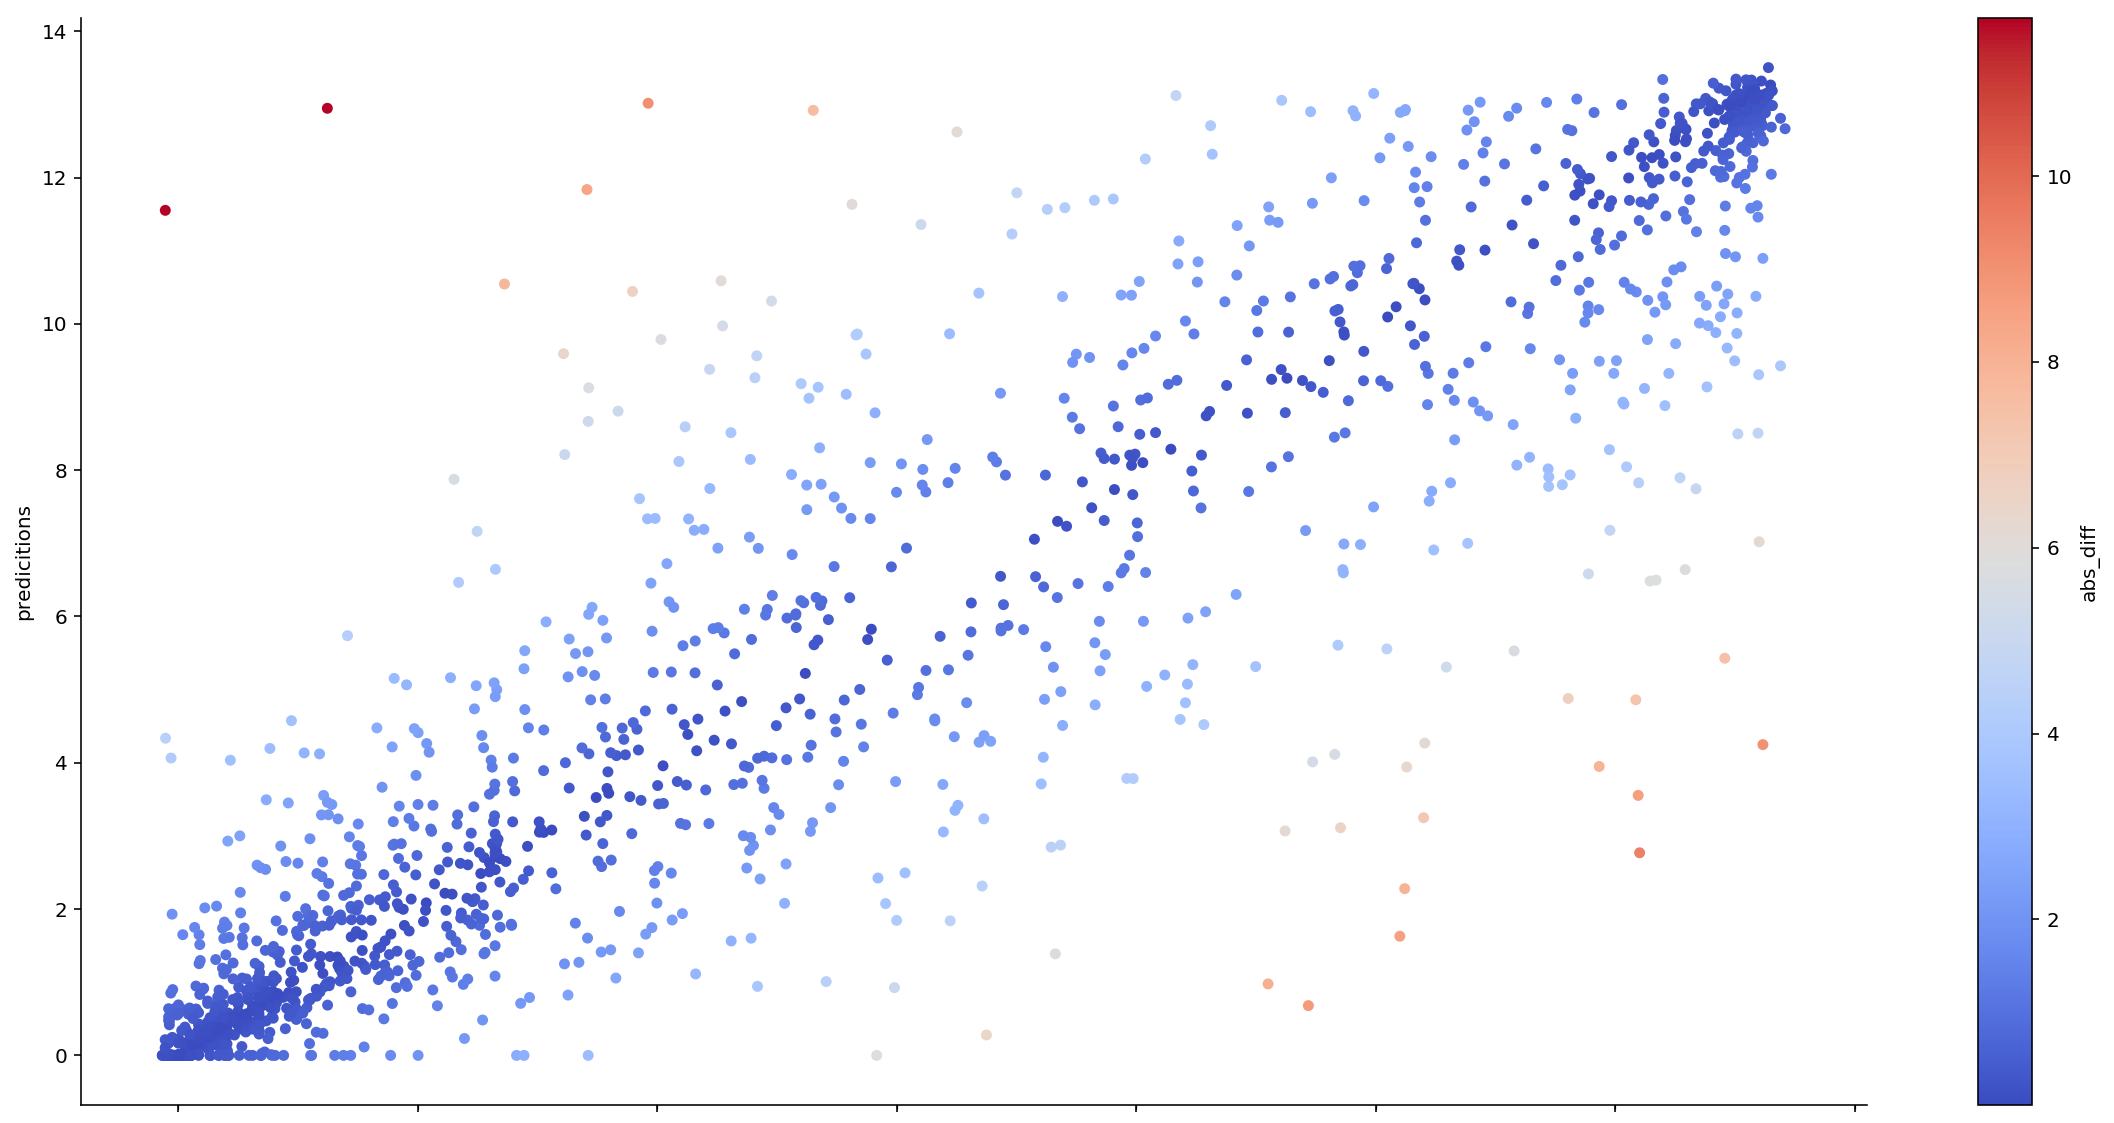

In [29]:
ax = Oversikt.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

### Feilfordelingen av prediksjoner

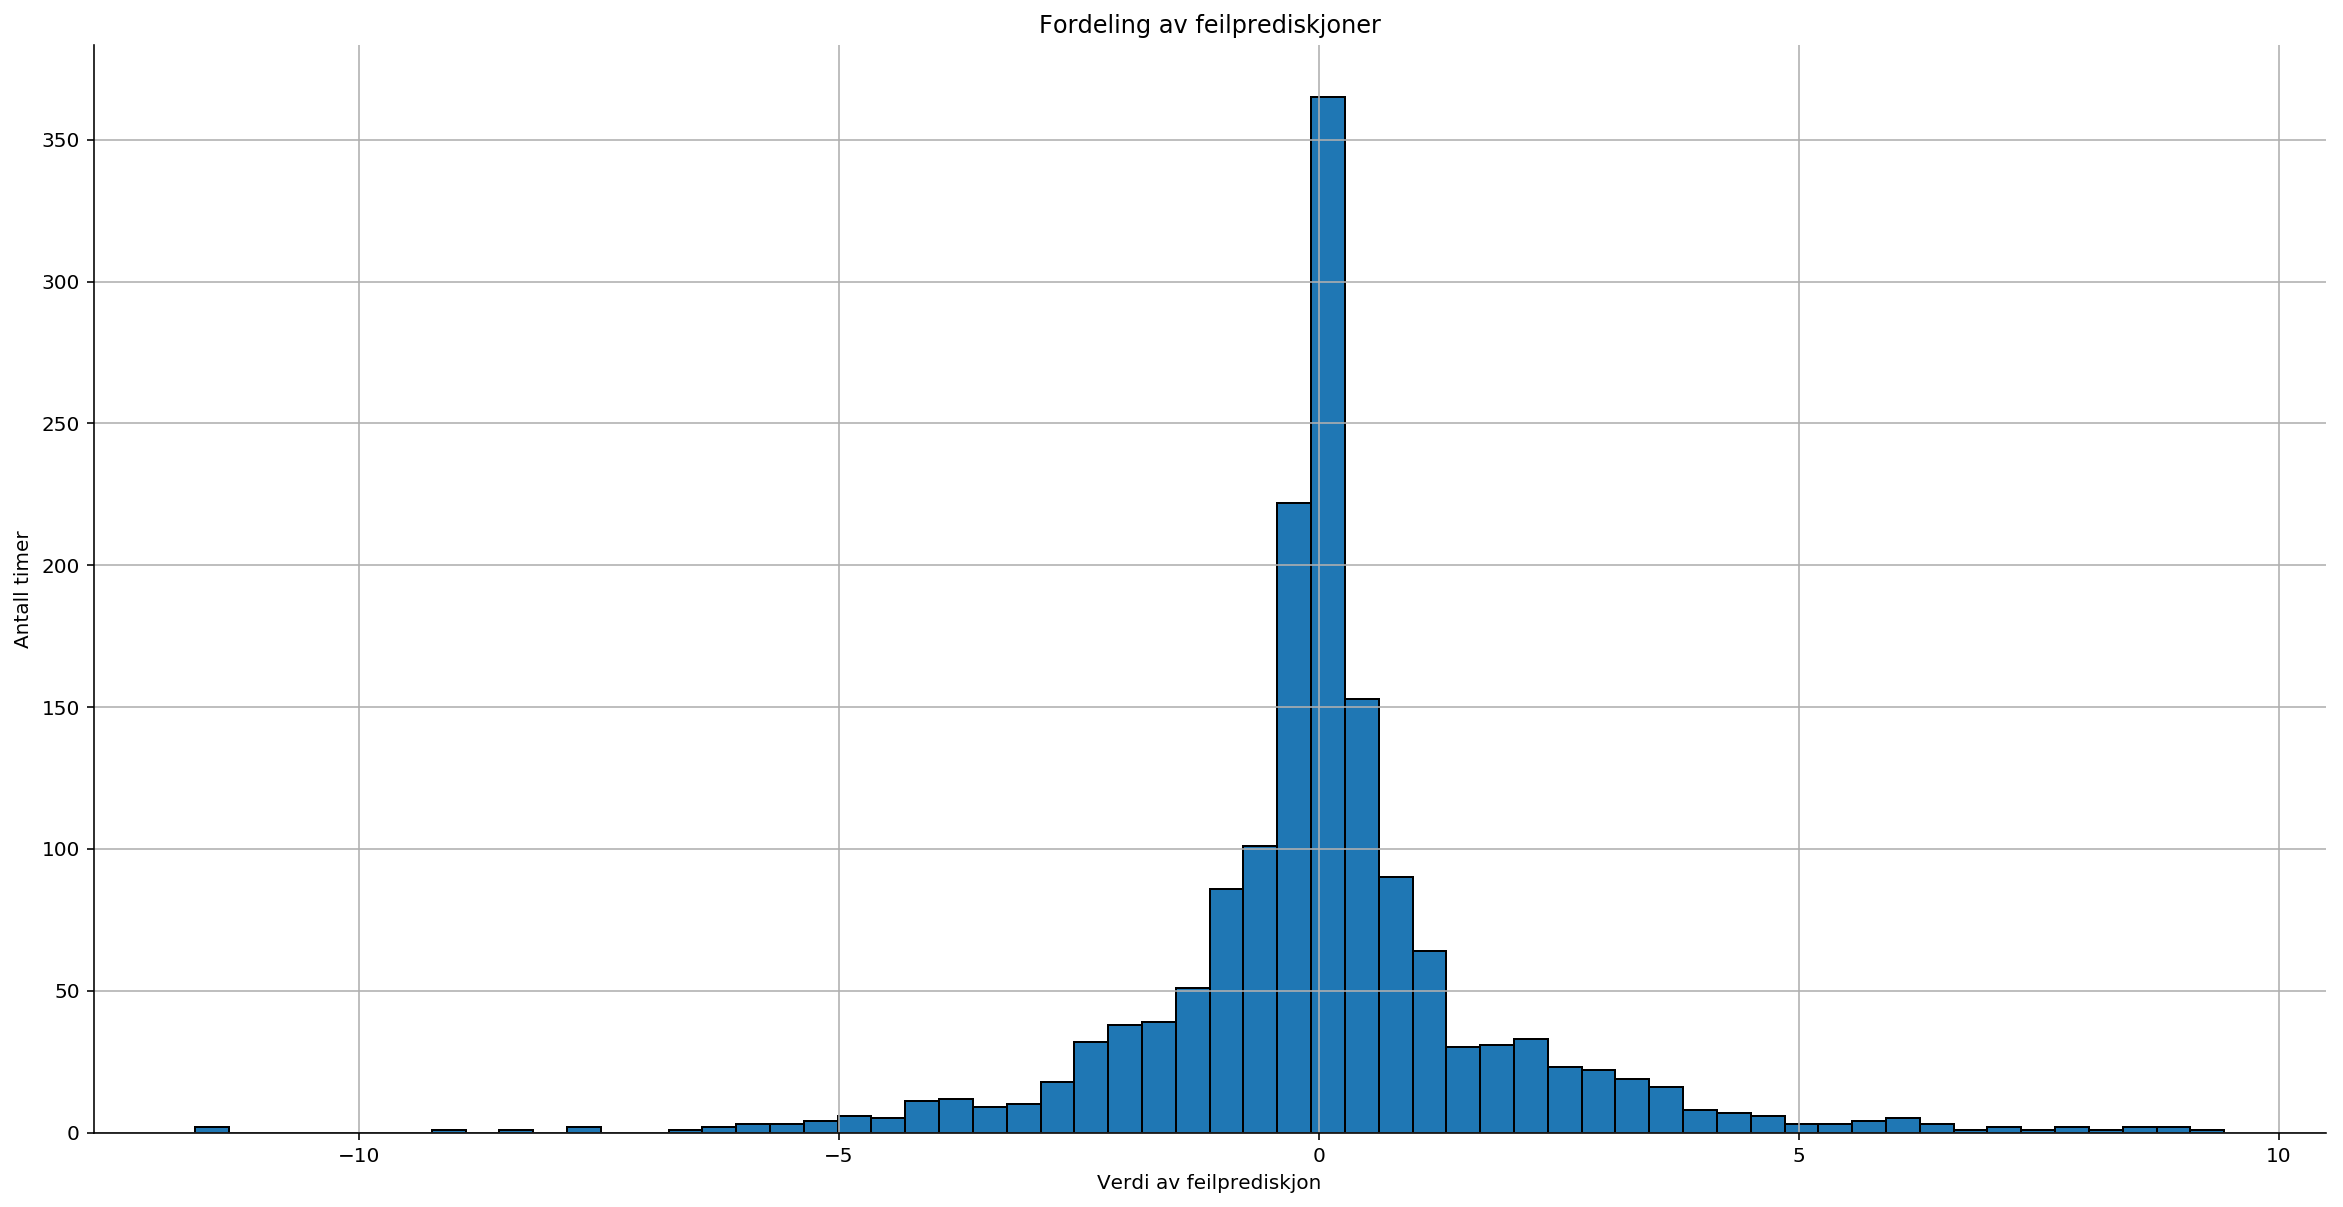

In [30]:
ax = Oversikt['differanse'].hist(bins=60,figsize = (20,10))

plt.xlabel('Verdi av feilprediskjon')
plt.ylabel('Antall timer')
plt.title('Fordeling av feilprediskjoner')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('hist av abs.png')

# Ekte plott av prediksjonene

#### Forsøk på å hente ut et utdrag av dataen

In [31]:
all_predictions = finished_model.predict(x[:,:])

predictions_all = list(all_predictions)

predictions_all_list = []

for pred in predictions_all:
    predictions_all_list.append(pred[0])
    
timeline = pd.DataFrame(data = {'real': y[:], 'predicitions': predictions_all_list})

# Adjust in order to plot 'dagens modell'
data_raw.dropna(inplace=True)
data_raw.reset_index(inplace=True)

#### Tidsplot av data

KeyError: 'the label [YVIK-YtreVikna1-Sum-produksjon] is not in the [columns]'

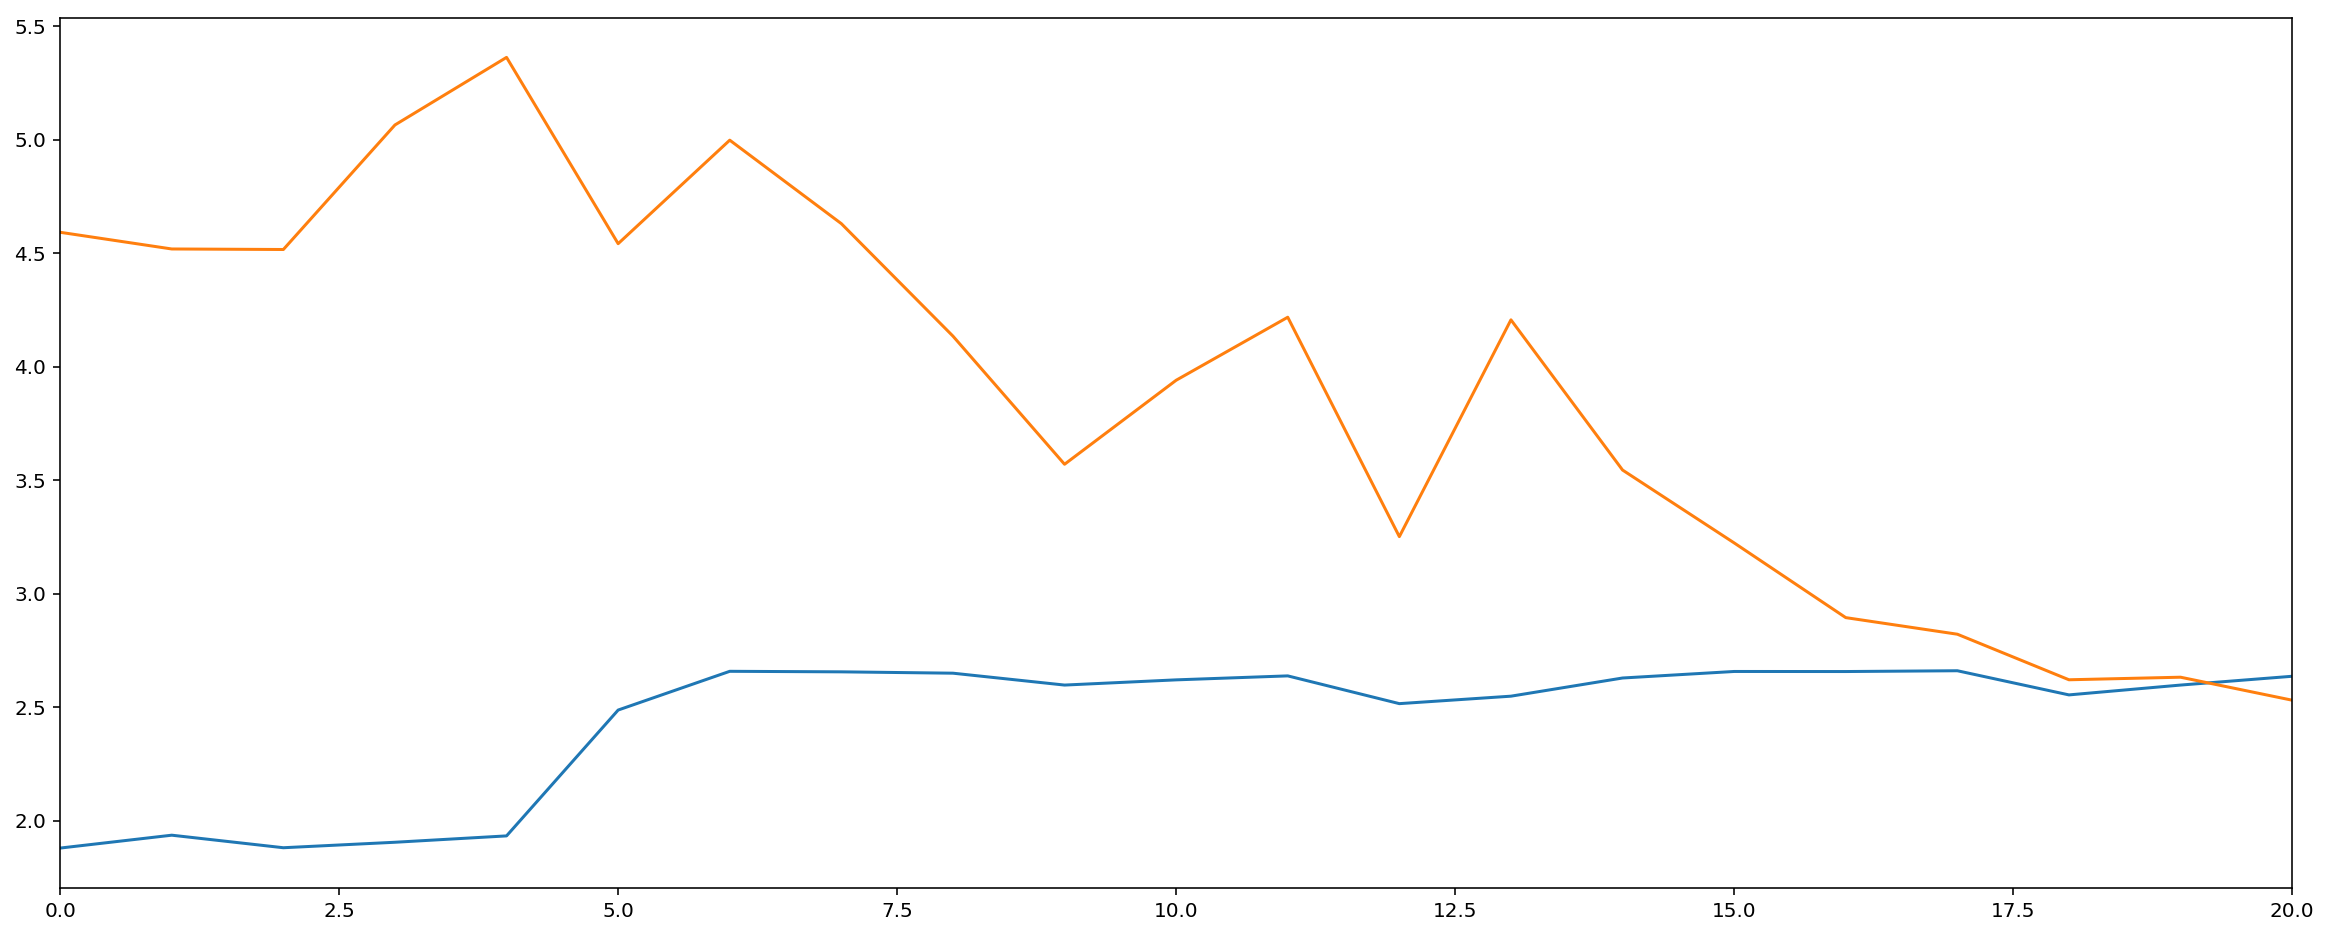

In [32]:
# Justere tidslinjen på plottet
start = 0
slutt = 20

ax = timeline.loc[start:slutt,'real'].plot(figsize=(20,8))
ax = timeline.loc[start:slutt,'predicitions'].plot(figsize=(20,8))
ax = data_raw.loc[start:slutt,'YVIK-YtreVikna1-Sum-produksjon'].plot(figsize=(20,8))

 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra tidsperioden')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('september10.png')